#  Description of the Problem and Discussion of the Background 

## Deciding where to open a new venue in London (outside Inner City Limits)

London is a great city. It is diverse, multicultural and full of opportunities. But there is also another side to its popularity and appeal. London is an expensive place to live and thrive. Many businesses want to open a venue here and many pay top price to have their window on Piccadilly or Oxford Street. But what about those, who want to start their own business and cannot really afford to open in the City yet? Where is it best to open a new place? Where will it be cheapest and will have enough people living around to be popular? Where the competition is not too overwhelming?

All these questions and more will be answered below. The whole process will be carried out via the below plan:

<font color=deepskyblue> Obtain the Data </font>

1.a. Name of the London Boroughs, area and population from web scrapping

1.b. Filter the boroughs to get the best candidates for the analysis.

1.c. Use Foresquare Data to obtain info about most popular venues.

<font color=deepskyblue> Data Visualization and Some Simple Statistical Analysis. </font>

<font color=deepskyblue> Analysis Using Clustering, Specially K-Means Clustering. </font>

3.a. Maximize the number of clusters.

3.b. Visualization using Chloropleth Map

<font color=deepskyblue> Compare the Neighborhoods to Find the Best Place for Starting up a Venue. </font>
<font color=deepskyblue> Inference From these Results and related Conclusions. </font>

<font color=orangered>Target Audience</font>

1. First time enterpreneurs, who want to start their first business. Below dataset will give a comprehensive insight into where best to open a new venue, to maximise the value for money.

2. People who already run a business and want to branch out. Given the extra information, it may provide valuable information before decision making.


2. Initial Data Preparation (Week 1)
2.1. Get The Names of Boroughs, Areas, Population, Coordinates from Wikipedia 2.2. Processing the Information From Wiki To Make Necessary Lists 2.3. Check and Compare with Google Search and Refine if Necessary

First, we get the nessessary information on London Boroughs, dropping the extras, that will not be needed for the analysis.

In [143]:
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import requests
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors


url='https://en.wikipedia.org/wiki/List_of_London_boroughs'

LDF=pd.read_html(url, header=0)[0]

LDF.head()

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"North London Business Park, Oakleigh Road South",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20


In [144]:
LF = LDF.drop(['Status','Local authority','Political control','Headquarters','Nr. in map'], axis=1)
LF['Inner'].replace(np.nan,'0', inplace=True)
LF['Borough'].replace('Barking and Dagenham [note 1]','Barking and Dagenham', inplace=True)
LF['Borough'].replace('Greenwich [note 2]','Greenwich', inplace=True)
LF['Borough'].replace('Hammersmith and Fulham [note 4]','Hammersmith and Fulham', inplace=True)
Inn = ['Camden','Greenwich','Hackney','Hammersmith and Fulham','Islington','Kensington and Chelsea','Lewisham','Lambeth','Southwark','Tower Hamlets','Wandsworth','Westminster']
LF.head()
LF['Inner'] = '0'
LF.head()

,Borough,Inner,Area (sq mi),Population (2013 est)[1],Co-ordinates
0,Barking and Dagenham,0,13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E
1,Barnet,0,33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W
2,Bexley,0,23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E
3,Brent,0,16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W
4,Bromley,0,57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E


Then we rename the columns, making the dataset better on the eyes. Because of extra notes in the Wiki page, we will rename some of the Boroughs. Due to the staggering difference in rent price, as well as the ammount of venues in London, we will filter to have only the Outer boroughs going forward

In [145]:
LF['Inner'] = LF.Borough.isin(Inn).astype(int)
Out = LF[LF.Inner == 0]
Out = Out.drop(['Inner'], axis=1)
df = Out.rename(columns = {"Area (sq mi)": "Area", 
                            "Population (2013 est)[1]":"Population"})
geolocator = Nominatim(user_agent="London_explorer")
df['Co-ordinates']= df['Borough'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
df[['Latitude', 'Longitude']] = df['Co-ordinates'].apply(pd.Series)
df.head()

,Borough,Area,Population,Co-ordinates,Latitude,Longitude
0,Barking and Dagenham,13.93,194352,"(51.5541171, 0.150504342619943)",51.554117,0.150504
1,Barnet,33.49,369088,"(44.297316, -72.049713)",44.297316,-72.049713
2,Bexley,23.38,236687,"(51.4416793, 0.150488)",51.441679,0.150488
3,Brent,16.70,317264,"(39.0547833, -84.4335518)",39.054783,-84.433552
4,Bromley,57.97,317899,"(51.4028046, 0.0148142)",51.402805,0.014814


Finally, we edit the coordinates, that are incorrect. Lets filter the set even more - because rent price is a big issue for the new business, we will get the boroughs with the lowest ones.

In [146]:
Max_Rent = ['102.25','150.75','97','150.75','118.5','129.25','140','102.25','107.75','140','86','161.5','161.5','140','123.75','134.5','118.5','140','129.25','145.25']
df['Max_Rent'] = Max_Rent

df["Max_Rent"] = pd.to_numeric(df["Max_Rent"])
fin = df[df.Max_Rent <= 125]
fin

Long_list = fin['Longitude'].tolist()
Lat_list = fin['Latitude'].tolist()
print ("Old latitude list: ", Lat_list)
print ("Old Longitude list: ", Long_list)

replace_longitudes = {-106.6621329:0.0799, -2.8417544: 0.1837}
replace_latitudes = {50.7164496:51.6636, 51.0358628: 51.5499}

longtitudes_new = [replace_longitudes.get(n7,n7) for n7 in Long_list]
latitudes_new = [replace_latitudes.get(n7,n7) for n7 in Lat_list]

fin = fin.drop(['Co-ordinates', 'Longitude'], axis=1)

fin['Longitude'] = longtitudes_new
fin['Latitude'] = latitudes_new
fin

Old latitude list:  [51.5541171, 51.4416793, 51.4028046, 50.7164496, 51.58792985, 51.0358628, 51.41080285, 51.5763203]
Old Longitude list:  [0.150504342619943, 0.150488, 0.0148142, -106.6621329, -0.10541010599099, -2.8417544, -0.188098505955727, 0.0454097]


,Borough,Area,Population,Latitude,Max_Rent,Longitude
0,Barking and Dagenham,13.93,194352,51.554117,102.25,0.150504
2,Bexley,23.38,236687,51.441679,97.00,0.150488
4,Bromley,57.97,317899,51.402805,118.50,0.014814
8,Enfield,31.74,320524,51.663600,102.25,0.079900
12,Haringey,11.42,263386,51.587930,107.75,-0.105410
14,Havering,43.35,242080,51.549900,86.00,0.183700
22,Merton,14.52,203223,51.410803,123.75,-0.188099
24,Redbridge,21.78,288272,51.576320,118.50,0.045410


Now lets make a map, with all boroughs in question marked up

In [147]:
address = 'London'

geolocator = Nominatim(user_agent="London_explorer")
location = geolocator.geocode(address)
London_latitude = location.latitude
London_longitude = location.longitude
print('The geograpical coordinates of London are {}, {}.'.format(London_latitude, London_longitude))

The geograpical coordinates of London are 51.5073219, -0.1276474.


In [148]:
!pip install folium
import folium

Fin_Brgh = folium.Map(location=[London_latitude, London_longitude], zoom_start=12)


for lat, lng, label in zip(fin['Latitude'], fin['Longitude'], 
                            fin['Borough']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=9,
        popup=label,
        color='Red',
        fill=True,
        fill_color='#Blue',
        fill_opacity=0.7).add_to(Fin_Brgh)
Fin_Brgh

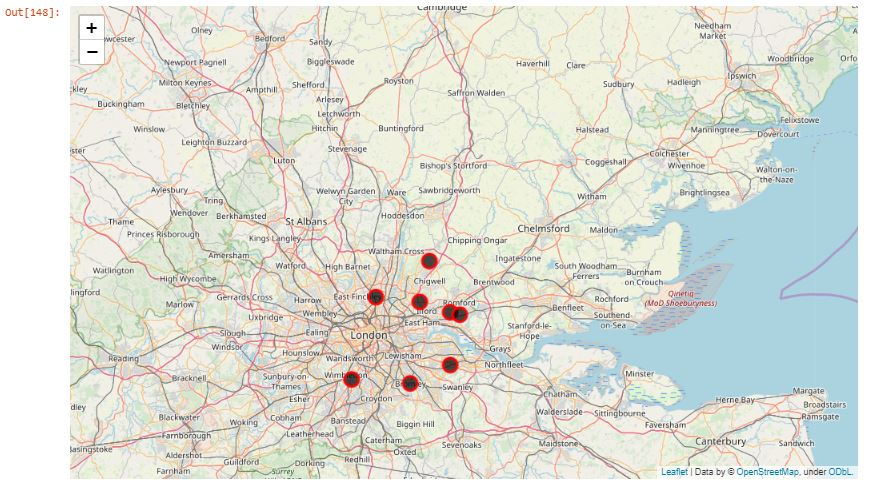

Now that we have a map, its time to get the venues from Foursquare. Due to a big borough area, we will take a rather big radius of search.

In [149]:
CLIENT_ID = 'QPT2O4JOXLDJW43COYX2F2N5XS02ATEO5W4POCBNGJ4WPS3Y' #'your-client-ID' # your Foursquare ID
CLIENT_SECRET = 'NHZXDY231F3WQ2WRJOMRCM1B34YPFWHGVG454INTLYNX05C5' #'your-client-secret' # your Foursquare Secret
VERSION = '20190915' # Foursquare API version

print('My credentails:')
print('My CLIENT_ID: ' + CLIENT_ID)
print('My CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
My CLIENT_ID: QPT2O4JOXLDJW43COYX2F2N5XS02ATEO5W4POCBNGJ4WPS3Y
My CLIENT_SECRET:NHZXDY231F3WQ2WRJOMRCM1B34YPFWHGVG454INTLYNX05C5


In [150]:
radius = 5000
LIMIT = 100

def getVenues(names, latitudes, longitudes, radius=5000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue_Lat', 
                  'Venue_Long', 
                  'Venue_Category']
    
    return(nearby_venues)

In [151]:
Brgh_Venues = getVenues(names=fin['Borough'],
                        latitudes=fin['Latitude'],
                        longitudes=fin['Longitude'])

Barking and Dagenham
Bexley
Bromley
Enfield
Haringey
Havering
Merton
Redbridge


Lets count the venues in every borough, to get the data scale

In [152]:
Brgh_Venues.groupby('Borough').count()

,Latitude,Longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
Borough,,,,,,
Barking and Dagenham,100,100,100,100,100,100
Bexley,100,100,100,100,100,100
Bromley,100,100,100,100,100,100
Enfield,72,72,72,72,72,72
Haringey,100,100,100,100,100,100
Havering,100,100,100,100,100,100
Merton,100,100,100,100,100,100
Redbridge,100,100,100,100,100,100


Lets break these numbers down to see which venues are more popular than the others

In [153]:
London_Brgh_onehot = pd.get_dummies(Brgh_Venues[['Venue_Category']], prefix="", prefix_sep="")
mid =  Brgh_Venues['Borough']

London_Brgh_onehot.insert(0, 'Borough', mid)

London_Brgh_onehot.head()

,Borough,American Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Bakery,Bar,Beer Bar,...,Train Station,Truck Stop,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Windmill,Wine Bar,Women's Store
0,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [154]:
Brgh_grouped = London_Brgh_onehot.groupby('Borough').mean().reset_index()
Brgh_grouped

,Borough,American Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Bakery,Bar,Beer Bar,...,Train Station,Truck Stop,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Windmill,Wine Bar,Women's Store
0,Barking and Dagenham,0.01,0.00,0.00,0.00,0.00,0.00,0.020000,0.01,0.00,...,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.01
1,Bexley,0.01,0.00,0.00,0.01,0.00,0.01,0.020000,0.01,0.01,...,0.02,0.000000,0.000000,0.00,0.01,0.00,0.000000,0.00,0.00,0.00
2,Bromley,0.01,0.00,0.00,0.00,0.01,0.01,0.000000,0.02,0.00,...,0.00,0.000000,0.020000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00
3,Enfield,0.00,0.00,0.00,0.00,0.00,0.00,0.027778,0.00,0.00,...,0.00,0.013889,0.013889,0.00,0.00,0.00,0.013889,0.00,0.00,0.00
4,Haringey,0.00,0.00,0.00,0.00,0.00,0.00,0.040000,0.02,0.00,...,0.00,0.000000,0.050000,0.01,0.00,0.00,0.000000,0.00,0.01,0.00
5,Havering,0.01,0.00,0.00,0.00,0.00,0.00,0.020000,0.01,0.00,...,0.00,0.000000,0.010000,0.00,0.00,0.00,0.000000,0.01,0.00,0.01
6,Merton,0.00,0.01,0.00,0.00,0.02,0.00,0.010000,0.04,0.00,...,0.00,0.000000,0.010000,0.01,0.00,0.01,0.000000,0.00,0.01,0.00
7,Redbridge,0.00,0.00,0.02,0.00,0.00,0.00,0.030000,0.03,0.00,...,0.00,0.000000,0.020000,0.01,0.00,0.00,0.000000,0.00,0.01,0.00


With all those zeros, it is easy to assume, that people there just sit at home! Lets see, which of the venues are most popular?

In [155]:
num_top_venues = 5

for brgh in Brgh_grouped['Borough']:
    print("_________"+brgh+"________")
    temp = Brgh_grouped[Brgh_grouped['Borough'] == brgh].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

_________Barking and Dagenham________
           venue  freq
0    Supermarket  0.10
1    Coffee Shop  0.08
2  Grocery Store  0.08
3           Park  0.07
4            Pub  0.07


_________Bexley________
           venue  freq
0            Pub  0.13
1  Grocery Store  0.13
2    Coffee Shop  0.08
3    Supermarket  0.07
4           Park  0.05


_________Bromley________
                  venue  freq
0                   Pub  0.11
1           Coffee Shop  0.11
2         Grocery Store  0.07
3                  Park  0.06
4  Gym / Fitness Center  0.05


_________Enfield________
                venue  freq
0                 Pub  0.19
1         Coffee Shop  0.14
2  Italian Restaurant  0.07
3                Café  0.07
4       Grocery Store  0.06


_________Haringey________
                venue  freq
0                 Pub  0.09
1         Coffee Shop  0.08
2                Café  0.06
3                Park  0.06
4  Turkish Restaurant  0.05


_________Havering________
           venue  freq
0          

We all love NumPy Arrays, but the dataframes are better.

In [156]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
brgh_venues_sorted = pd.DataFrame(columns=columns)
brgh_venues_sorted['Borough'] = Brgh_grouped['Borough']

for ind in np.arange(Brgh_grouped.shape[0]):
    brgh_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Brgh_grouped.iloc[ind, :], num_top_venues)

brgh_venues_sorted.head(8)

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Barking and Dagenham,Supermarket,Grocery Store,Coffee Shop,Pub,Park
1,Bexley,Grocery Store,Pub,Coffee Shop,Supermarket,Park
2,Bromley,Coffee Shop,Pub,Grocery Store,Park,Gym / Fitness Center
3,Enfield,Pub,Coffee Shop,Café,Italian Restaurant,Grocery Store
4,Haringey,Pub,Coffee Shop,Park,Café,Turkish Restaurant
5,Havering,Pub,Coffee Shop,Supermarket,Grocery Store,Italian Restaurant
6,Merton,Pub,Park,Italian Restaurant,Coffee Shop,Sushi Restaurant
7,Redbridge,Pub,Park,Coffee Shop,Pizza Place,Restaurant


Because the ammount of boroughs is small, we will have only 3 clusters

In [157]:
kclusters = 3

brgh_grouped_clustering = Brgh_grouped.drop('Borough', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(brgh_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 2, 2, 1, 0, 2, 0, 0], dtype=int32)

And now - lets join all of our dataframes together for the main event!

In [158]:
brgh_venues_sorted.insert(0, 'Cluster Label', kmeans.labels_)
Borough_merged = pd.merge(fin,brgh_venues_sorted, on='Borough')
Borough_merged

,Borough,Area,Population,Latitude,Max_Rent,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Barking and Dagenham,13.93,194352,51.554117,102.25,0.150504,2,Supermarket,Grocery Store,Coffee Shop,Pub,Park
1,Bexley,23.38,236687,51.441679,97.00,0.150488,2,Grocery Store,Pub,Coffee Shop,Supermarket,Park
2,Bromley,57.97,317899,51.402805,118.50,0.014814,2,Coffee Shop,Pub,Grocery Store,Park,Gym / Fitness Center
3,Enfield,31.74,320524,51.663600,102.25,0.079900,1,Pub,Coffee Shop,Café,Italian Restaurant,Grocery Store
4,Haringey,11.42,263386,51.587930,107.75,-0.105410,0,Pub,Coffee Shop,Park,Café,Turkish Restaurant
5,Havering,43.35,242080,51.549900,86.00,0.183700,2,Pub,Coffee Shop,Supermarket,Grocery Store,Italian Restaurant
6,Merton,14.52,203223,51.410803,123.75,-0.188099,0,Pub,Park,Italian Restaurant,Coffee Shop,Sushi Restaurant
7,Redbridge,21.78,288272,51.576320,118.50,0.045410,0,Pub,Park,Coffee Shop,Pizza Place,Restaurant


Mapping the clusters. Not what you expect, from our first map

In [159]:
map_clusters = folium.Map(location=[London_latitude, London_longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, rent, pop in zip(Borough_merged['Latitude'],
                                  Borough_merged['Longitude'],
                                  Borough_merged['Borough'],
                                  Borough_merged['Cluster Label'],
                                  Borough_merged['Max_Rent'],
                                  Borough_merged['Population']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster) + " " + "Rent " + str(rent) + " " + "Population " + str(pop), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=25,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

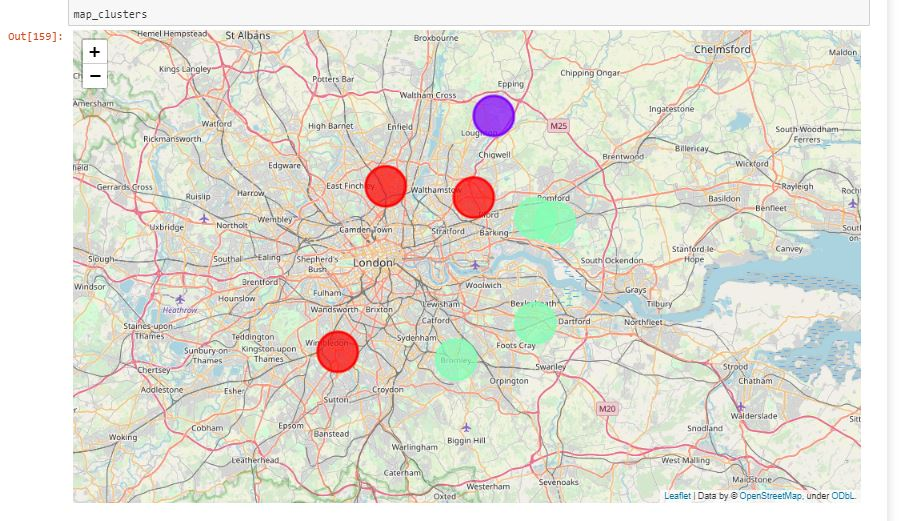

After seeing the clusters, it is worth looking into each one with a bit more detail, to see, which one is better suited for opening a venue.

In [160]:
Borough_merged.loc[Borough_merged['Cluster Label'] == 0, Borough_merged.columns[[0,1,2,4] + list(range(6, Borough_merged.shape[1]))]]

,Borough,Area,Population,Max_Rent,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
4,Haringey,11.42,263386,107.75,0,Pub,Coffee Shop,Park,Café,Turkish Restaurant
6,Merton,14.52,203223,123.75,0,Pub,Park,Italian Restaurant,Coffee Shop,Sushi Restaurant
7,Redbridge,21.78,288272,118.50,0,Pub,Park,Coffee Shop,Pizza Place,Restaurant


A very British picture: Pub as a most popular venue, and for those, who dont feel like a visit to a pub can enjoy the nature.
This cluster is hardly of interest, because it will be problematic to open a new Pub. Not to mention a Park...

In [161]:
Borough_merged.loc[Borough_merged['Cluster Label'] == 1, Borough_merged.columns[[0,1,2,4] + list(range(6, Borough_merged.shape[1]))]]

,Borough,Area,Population,Max_Rent,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
3,Enfield,31.74,320524,102.25,1,Pub,Coffee Shop,Café,Italian Restaurant,Grocery Store


A great picture! Even though the Pub is a top venue, it is narrowly followed by Coffe Shop, Cafe and Italian Restaurant. With a sizeable area and population of the borough, Enfield if a good choice for a new venue of a similar sort

In [162]:
Borough_merged.loc[Borough_merged['Cluster Label'] == 2, Borough_merged.columns[[0,1,2,4] + list(range(6, Borough_merged.shape[1]))]]

,Borough,Area,Population,Max_Rent,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Barking and Dagenham,13.93,194352,102.25,2,Supermarket,Grocery Store,Coffee Shop,Pub,Park
1,Bexley,23.38,236687,97.00,2,Grocery Store,Pub,Coffee Shop,Supermarket,Park
2,Bromley,57.97,317899,118.50,2,Coffee Shop,Pub,Grocery Store,Park,Gym / Fitness Center
5,Havering,43.35,242080,86.00,2,Pub,Coffee Shop,Supermarket,Grocery Store,Italian Restaurant


Biggest and the most diverse cluster. Most of the boroughs are not heavy drinkers, but neither are they very outgoing.
Because I would not call visit to the grocery store as a social route!
However, Havering and Bromley are good fits to our target boroughs: both have entertainment venues as most common, both rather big and quite populated. 
In this situation perhaps Havering has a slight financial edge - cheaper rent a more incline to pubs and coffee shops in the area

### _Results_

Results of the above analysis and clustering cam be summarized:
1. The most popular social venues, ouside of Inner London boroughs are Pubs and Coffee shops
2. Northern boroughs are more prone to visiting pubs, whereas southern boroughs are most likely to shop and have the social life from home
3. Within top 5 places of interest in every borough is an ethnic restaurant
4. Rent price is not so much a factor for going out - the demand is not affected by difference in costs

### _Discussion_

Looking at the data, Havering, Bromley and Enfield are the best places outside of Central London where a new venue is worth opening. However, a lot of information is not taken into account, and cannot be obtained from Foursquare Developer:
1. Higher ethnic presence in a given borough can and will influence the popularity of a given cuisine.
2. Closer proximity to Inner boroughs and better transport links allows people to travel to the neighbouring borough and impact the measurements
3. Many small venues are not registered in Foursquare and are marketed via word-of-mouth, and are not taken into account

Regardless, the analysis provided an insight into what people like and opt for, when it comes to going out in their own neighbourhoods.


### _Conclusion_

Finally to conclude this project, I have had a good trial run at solving a real-life problem, using available data to find a business solution - choosing to open a venue in London .I have made use of some frequently used python librairies to manipilate data, use Foursquare API to explore the information on the Boroughs I looked into and managed to make a map of results, that allowed me to ilustrate my point graphicly and quite clearly to someone, not familiar with data manipulation and who only wants to know one thing - where will my venue be flourishing??